In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
songs= pd.read_csv("tracks.csv")
artists = pd.read_csv("artists.csv")
songs.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


#### Armamos un set de canciones de Radiohead

In [23]:
#Primero definimos la columna 'id_artists' como string
songs["artists"]=pd.Series(songs["artists"], dtype="string")
songs["id_artists"]=pd.Series(songs["id_artists"], dtype="string")
artistas = pd.Series(songs["artists"], dtype="string")
artistas.iloc[1]
artistas =artistas.str.find("['Radiohead']")
radioheadsongs = songs[songs["artists"]=="['Radiohead']"]

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1992-05-05,1lPCUFuewqILJlb23WR5ps,Prove Yourself - Drill Version,43,152973,0,['Radiohead'],['4Z8W4fKeB5YxbusRsdQVPb'],0.369,0.528,0,-13.250,1,0.0312,0.000270,0.075200,0.107,0.476,108.625,4
1992-09-21,62J6RO53R6vNhOB6QXajFV,Creep,38,238640,1,['Radiohead'],['4Z8W4fKeB5YxbusRsdQVPb'],0.515,0.430,7,-9.935,1,0.0372,0.009700,0.000133,0.129,0.104,91.844,4
1993-02-22,70LcF31zb1H0PyJoS1Sx1r,Creep,83,238640,1,['Radiohead'],['4Z8W4fKeB5YxbusRsdQVPb'],0.515,0.430,7,-9.935,1,0.0372,0.009700,0.000133,0.129,0.104,91.844,4
1993-02-22,5KZ0qobWEFl892YjIC02SE,You,54,208667,0,['Radiohead'],['4Z8W4fKeB5YxbusRsdQVPb'],0.222,0.707,9,-12.012,1,0.0578,0.000945,0.006840,0.109,0.298,112.663,3
1993-02-22,23oUaizFBFVFI5PxJrkiO5,Anyone Can Play Guitar,51,217800,0,['Radiohead'],['4Z8W4fKeB5YxbusRsdQVPb'],0.293,0.812,4,-10.772,0,0.0546,0.000101,0.000756,0.332,0.555,150.743,4


In [42]:
#Podemos dividir los albums por fecha y a partir de eso concluir cuales pertenecen al album correspondiente.
songsbyAlbum=radioheadsongs.set_index("release_date")
songsbyAlbum = songsbyAlbum.sort_index()
songsbyAlbum.head()
fechasAlbum = radioheadsongs["release_date"]
fechasAlbum.unique()


array(['1993-02-22', '1995-03-13', '1996-01-22', '1997-05-28',
       '2000-10-02', '2001-03-12', '2003-06-09', '2007-12-28',
       '2011-02-18', '1992-05-05', '2001-11-12', '2007', '1992-09-21',
       '1994-09-26', '1995-02-27', '2004-03-24', '1995-01-01'],
      dtype=object)

In [ ]:
def reemplazarFechas(lista_fechas):
    for i in lista_fechas:
        
        if lista_fechas[i] == '1993-02-22':
            album[i] = "Pablo Honey"
        if lista_fechas[i] == '1995-03-13':
            album[i] = "The Bends"
        if lista_fechas[i] == '1997-05-28':
            album[i] = "OK Computer"
        if lista_fechas[i] == '2000-10-02':
            album[i] = "Kid A"
        if lista_fechas[i] == '2001-03-12':
            album[i] = "Amnesiac"
        if lista_fechas[i] == '2003-06-09':
            album[i] = "I might be wrong"
#id_artists = songs["id_artists"].astype(basestring)
#id_artists

   ## Guia de las metrias para las canciones
   
  - Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.<br />
  - **Valence**: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
  - Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
  - Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
  - Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
  - Speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
  - Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
  - Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
  - Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
  - Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
  - Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
  - Duration: The duration of the track in milliseconds.
  - Time Signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

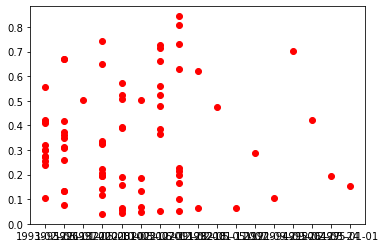

In [36]:
#Ahora para clasificar como felices o no, las canciones hay que medirles el Valence. 
#Mientras mas bajo sea el Valence, mas deprimente resulta la canción.
plt.figure()
plt.plot(radioheadsongs["release_date"],radioheadsongs["valence"],"ro")


La primer conclusion que salta a la vista es que hay algunos datos aislados, por lo que no tenemos album para los mismos.